In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Conv2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [3]:
Xtrain[0].shape

(28, 28)

In [4]:
nrow, ncol = Xtrain[0].shape
input_shape = (nrow, ncol, 1)

# rows, columns, channels
input_shape

(28, 28, 1)

In [5]:
nclass = len(np.unique(ytrain))
nclass

10

In [6]:
model = keras.models.Sequential()
model.add(Conv2D(16, (5, 5), activation = "relu", input_shape = input_shape))
model.add(Conv2D(32, (5, 5), activation = "relu"))
model.add(Dropout(.25))
model.add(Conv2D(64, (5, 5), activation = "relu"))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(.25))
model.add(Dense(nclass, activation = "softmax"))

In [7]:
model.compile(keras.optimizers.nadam(), 
              keras.losses.categorical_crossentropy, ["accuracy"])

In [13]:
#Scale to values between 0 and 1 indicating pixel intensity
Xtrain = Xtrain.astype(np.float32) / 255
Xtest = Xtest.astype(np.float32) / 255

#Add additional flat dimension
Xtrain = Xtrain.reshape(Xtrain.shape + (1,))
Xtest = Xtest.reshape(Xtest.shape + (1,))

In [9]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
#Convert column of class labels to one-hot-encoded matrix
ytrain = keras.utils.to_categorical(ytrain, nclass)
ytest = keras.utils.to_categorical(ytest, nclass)
ytrain[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [14]:
history = model.fit(Xtrain, ytrain, batch_size = 128, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 167s - loss: 0.4404 - acc: 0.8554   
Epoch 2/20
60000/60000 [==============================] - 170s - loss: 0.1106 - acc: 0.9672   
Epoch 3/20
60000/60000 [==============================] - 170s - loss: 0.0805 - acc: 0.9754   
Epoch 4/20
60000/60000 [==============================] - 170s - loss: 0.0638 - acc: 0.9807   
Epoch 5/20
60000/60000 [==============================] - 171s - loss: 0.0507 - acc: 0.9843   
Epoch 6/20
60000/60000 [==============================] - 172s - loss: 0.0433 - acc: 0.9866   
Epoch 7/20
60000/60000 [==============================] - 180s - loss: 0.0371 - acc: 0.9877   
Epoch 8/20
60000/60000 [==============================] - 172s - loss: 0.0337 - acc: 0.9890   
Epoch 9/20
60000/60000 [==============================] - 177s - loss: 0.0291 - acc: 0.9909   
Epoch 10/20
60000/60000 [==============================] - 169s - loss: 0.0254 - acc: 0.9916   
Epoch 11/20
60000/60000 [========================

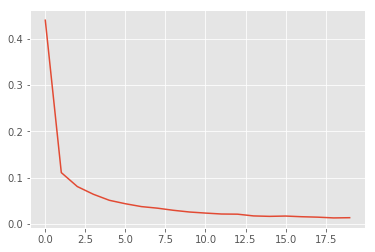

In [16]:
plt.plot(history.history["loss"])

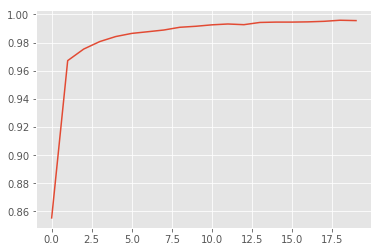

In [21]:
plt.plot(history.history["acc"])

In [22]:
scores = model.evaluate(Xtest, ytest)

 9984/10000 [============================>.] - ETA: 0s

In [23]:
# Loss, Accuracy
scores

[0.036193810128145425, 0.99109999999999998]